#### IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### DATA PROCESSING
#### DATA TRANING IMAGE PREPROCESSING

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


#### VALIDATION IMAGE PREPROCESSING

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[180.5  174.5  178.5 ]
   [174.25 168.25 172.25]
   [174.   168.   172.  ]
   ...
   [179.   173.   177.  ]
   [169.75 163.75 167.75]
   [174.75 168.75 172.75]]

  [[184.5  178.5  182.5 ]
   [179.25 173.25 177.25]
   [179.75 173.75 177.75]
   ...
   [168.5  162.5  166.5 ]
   [168.75 162.75 166.75]
   [182.   176.   180.  ]]

  [[182.75 176.75 180.75]
   [187.25 181.25 185.25]
   [186.75 180.75 184.75]
   ...
   [179.   173.   177.  ]
   [173.5  167.5  171.5 ]
   [172.75 166.75 170.75]]

  ...

  [[130.25 118.25 118.25]
   [141.   129.   129.  ]
   [139.25 127.25 127.25]
   ...
   [121.5  110.5  114.5 ]
   [122.75 111.75 115.75]
   [123.25 112.25 116.25]]

  [[140.5  128.5  128.5 ]
   [139.75 127.75 127.75]
   [124.25 112.25 112.25]
   ...
   [123.75 112.75 116.75]
   [121.   110.   114.  ]
   [112.25 101.25 105.25]]

  [[134.5  122.5  122.5 ]
   [124.75 112.75 112.75]
   [128.5  116.5  116.5 ]
   ...
   [116.75 105.75 109.75]
   [118.   107.   111.  ]
   [122.75 111.75 11

### BUILDING MODEL ARCHITECTURE (CNN)(feiding in neural network)

In [6]:
cnn = tf.keras.models.Sequential()

#### building convolutional layer

#first layer 

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

#### COMPILING MODEL

In [16]:
import tensorflow as tf

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

#### MODEL TRAINING

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2286s 1s/step - accuracy: 0.4605 - loss: 1.9101 - val_accuracy: 0.8268 - val_loss: 0.5407
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2304s 1s/step - accuracy: 0.8629 - loss: 0.4386 - val_accuracy: 0.8780 - val_loss: 0.4043
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2276s 1s/step - accuracy: 0.9181 - loss: 0.2511 - val_accuracy: 0.9287 - val_loss: 0.2309
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2224s 1s/step - accuracy: 0.9447 - loss: 0.1715 - val_accuracy: 0.9401 - val_loss: 0.1835
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2240s 1s/step - accuracy: 0.9605 - loss: 0.1204 - val_accuracy: 0.9295 - val_loss: 0.2444
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2232s 1s/step - accuracy: 0.9684 - loss: 0.0985 - val_accuracy: 0.9385 - val_loss: 0.2072
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2243s 1s/step - accuracy: 0.9741 - loss: 0.0780 - val_accuracy: 0.9503 - val_loss: 0.1701
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2286s 1s/step - accuracy: 0.9805 -

#### MODEL EVALUATION

In [19]:
# model evaluation on training set
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc) 

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 827s 376ms/step - accuracy: 0.9853 - loss: 0.0450
Training accuracy: 0.9860729575157166


In [20]:
#model evaluation on validation set
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 192s 349ms/step - accuracy: 0.9519 - loss: 0.1766
Validation accuracy: 0.954245388507843


In [21]:
print('training loss:' , train_loss) #printing training and validation loss
print('validation loss:' , val_loss)

training loss: 0.042238906025886536
validation loss: 0.16675041615962982


#### SAVING MODEL

In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6535599827766418,
  0.8817839026451111,
  0.9263532161712646,
  0.9482466578483582,
  0.9634113311767578,
  0.9701116681098938,
  0.9758304357528687,
  0.9805249571800232,
  0.9821751117706299,
  0.9837968349456787],
 'loss': [1.1687607765197754,
  0.37459996342658997,
  0.22594796121120453,
  0.15837080776691437,
  0.11005495488643646,
  0.09267327934503555,
  0.07420175522565842,
  0.060410596430301666,
  0.05511097237467766,
  0.050918661057949066],
 'val_accuracy': [0.8268267512321472,
  0.878044605255127,
  0.9286933541297913,
  0.9401320219039917,
  0.9295470118522644,
  0.9384816884994507,
  0.9502617716789246,
  0.9480423331260681,
  0.9583427906036377,
  0.954245388507843],
 'val_loss': [0.5406926870346069,
  0.4043126106262207,
  0.23086625337600708,
  0.1834600567817688,
  0.24443919956684113,
  0.20715007185935974,
  0.17007650434970856,
  0.19953249394893646,
  0.15718063712120056,
  0.1667502522468567]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#### ACCURACY VISUALIZATION

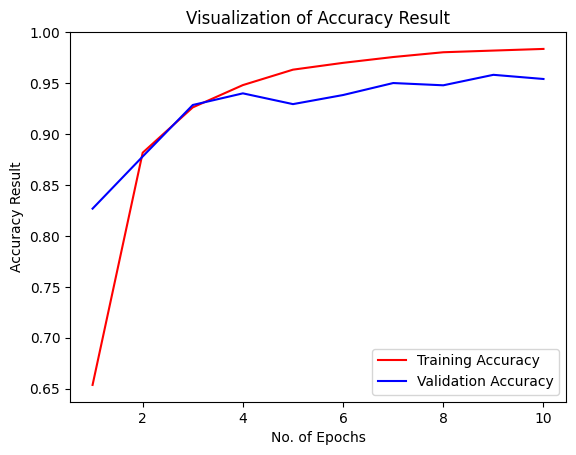

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

#### SOME OTHER METRICS FOR MODEL EVALUATION 

In [27]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = cnn.predict(test_set)# predicting the model
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 292s 17ms/step


In [30]:
y_pred.shape # printing matrix shape

(17572, 38)

In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

#### PRECISION RECALL 
IT MEASURES THE PERCENTAGE OF PREDICTION MADE BY AN MODEL THAT ARE CORRECT 

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.95       504
                                 Apple___Black_rot       0.93      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.91      0.99      0.95       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.95      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.96      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

#### CONFUSION MATRIX VISUALIZATION

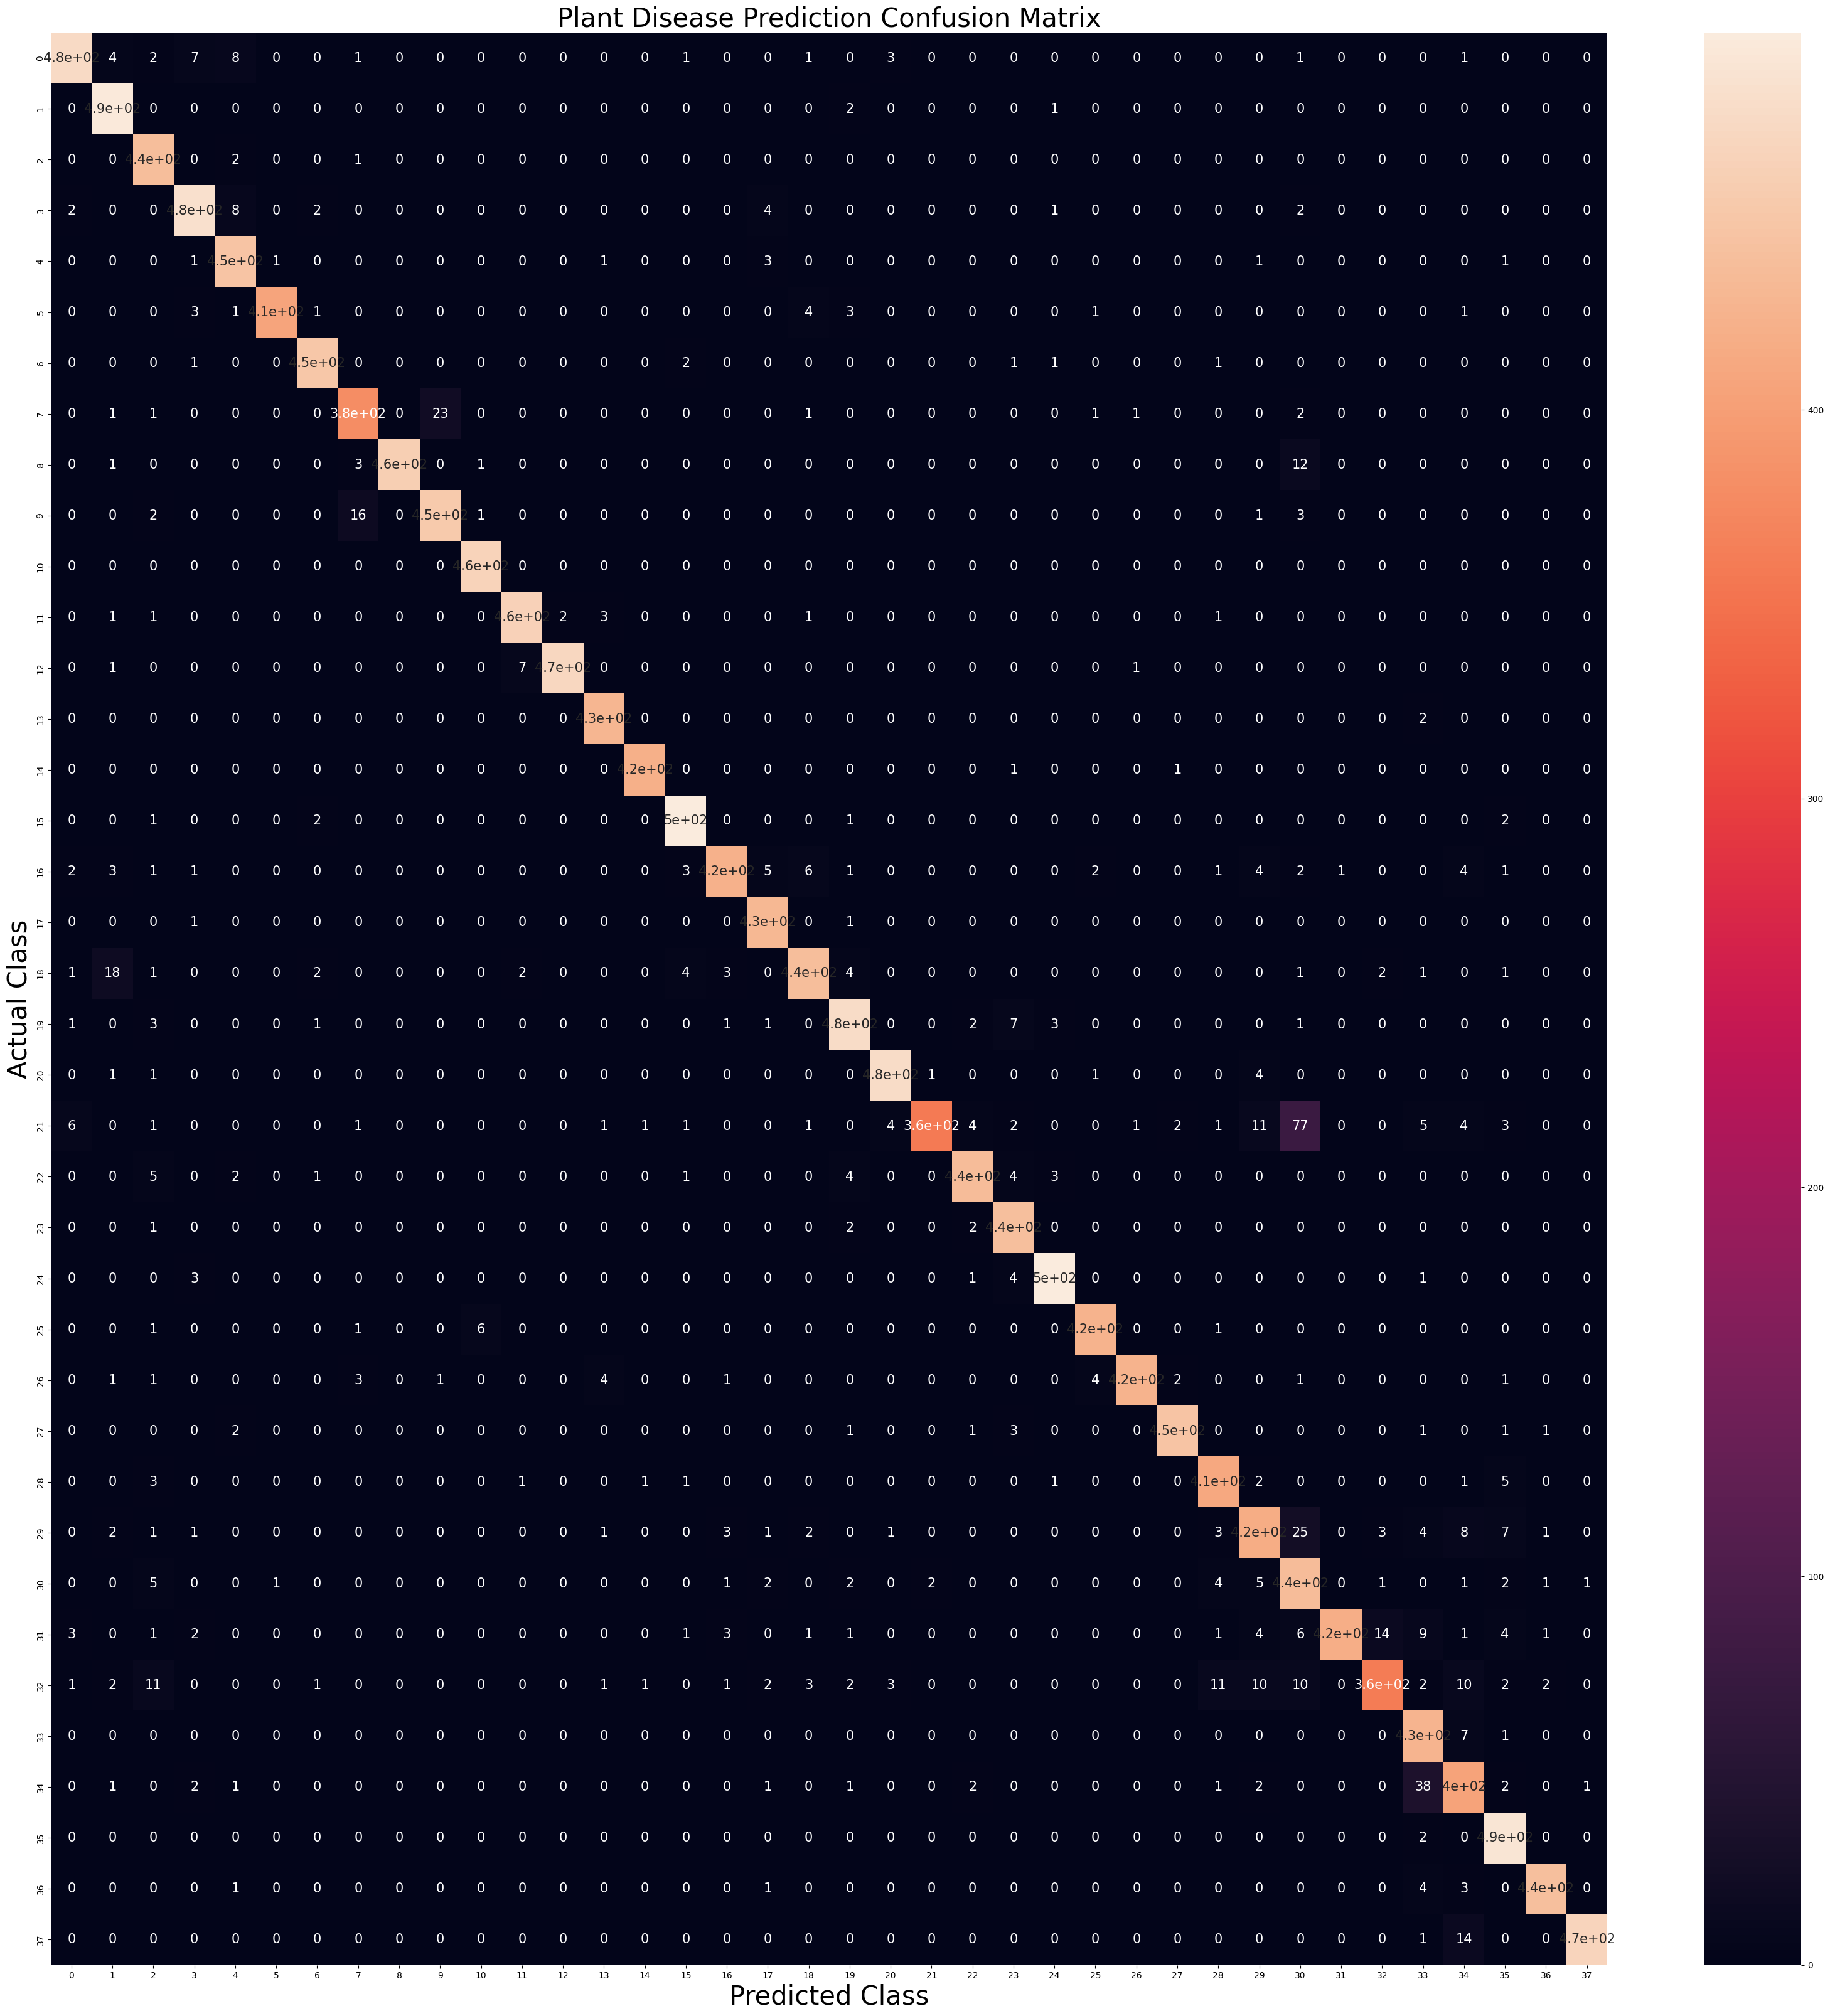

In [36]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 15})

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 30)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 30)
plt.show()